# CIS 705 Python Intro Class 2018/08/30

## Getting started

* hello world program
* [Markdown documentation](https://daringfireball.net/projects/markdown/syntax)

In [2]:
# print statement
print("hello")

hello


## Reading CSV Files, loops, modules, if-statements, arrays/lists

Get the Forest Cover data set from [Kaggle](https://www.kaggle.com/c/forest-cover-type-kernels-only/data)

Unzip it and put the files in the same directory where you started Jupyter Notebook.

We will 

* print out the first 10 rows
* add a line number and change delimiter to pipe
* copy the data less header into an array/list
* print the first non-header row as a list object (cf. formatted print in the loop). Note the meaning of the formatting.


In [1]:
import csv

with open('train.csv', newline='') as csvfile:
    trainingdata = csv.reader(csvfile, delimiter=',')
    
    i=0
    copydata=[]
    for row in trainingdata:
        if i>0:
            copydata.append(row)
        if i<10:
            print(str(i)+ ' : ' + '|'.join(row))
        i = i+1
    
    print(copydata[1])

0 : Id|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|Wilderness_Area1|Wilderness_Area2|Wilderness_Area3|Wilderness_Area4|Soil_Type1|Soil_Type2|Soil_Type3|Soil_Type4|Soil_Type5|Soil_Type6|Soil_Type7|Soil_Type8|Soil_Type9|Soil_Type10|Soil_Type11|Soil_Type12|Soil_Type13|Soil_Type14|Soil_Type15|Soil_Type16|Soil_Type17|Soil_Type18|Soil_Type19|Soil_Type20|Soil_Type21|Soil_Type22|Soil_Type23|Soil_Type24|Soil_Type25|Soil_Type26|Soil_Type27|Soil_Type28|Soil_Type29|Soil_Type30|Soil_Type31|Soil_Type32|Soil_Type33|Soil_Type34|Soil_Type35|Soil_Type36|Soil_Type37|Soil_Type38|Soil_Type39|Soil_Type40|Cover_Type
1 : 1|2596|51|3|258|0|510|221|232|148|6279|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0|0|5
2 : 2|2590|56|2|212|-6|390|220|235|151|6225|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0

## Using a for loop to find the average value

Find the average elevation


In [4]:
total=0
cnt=0
for row in copydata:
    total += int(row[1])
    cnt += 1

print('total = '+str(total))
print('cnt = ' + str(cnt))
print(str(total/cnt))



total = 41569757
cnt = 15120
2749.3225529100528


## Code re-use via defining functions

package frequently used code into a function.

add a column number into the input arguments of the function

In [5]:
def getavgv(listofstr):
    total=0
    cnt=0
    for row in listofstr:
        total += int(row[1])
        cnt += 1
    return (total/cnt)

print("Average Elevation = " + str(getavgv(copydata)))

def getavgv2(listofstr, col):
    total=0
    cnt=0
    for row in listofstr:
        total += int(row[col])
        cnt += 1
    return (total/cnt)

print("Average Aspect = " + str(getavgv2(copydata,2)))

Average Elevation = 2749.3225529100528
Average Aspect = 156.67665343915343


## Find the variance

variance = $E[(X-\mu)^2] = \frac{1}{n} \sum_{i=1}^{n} (x_i-\mu)^2$

Use $Var(X) = E[X^2] - (E[X])^2$ to find the variance in a single pass over the data

In [6]:
def getVariance(datatable, col):
    avg = getavgv2(datatable,col)
    total=0
    cnt=0
    for row in datatable:
        dev = int(row[col]) - avg
        total += dev*dev
        cnt += 1
    return (total/cnt)

print(getVariance(copydata,2))

12118.082153350722


## Plotting

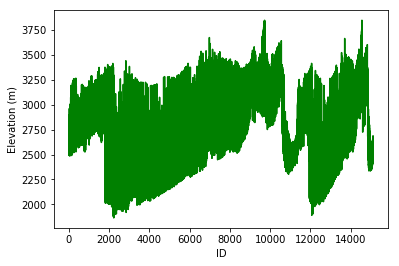

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

xdata = [ int(row[0]) for row in copydata ]
ydata = [ int(row[1]) for row in copydata ]

plt.plot(xdata, ydata, color='green', linestyle='solid')
plt.ylabel('Elevation (m)')
plt.xlabel('ID')
plt.show()

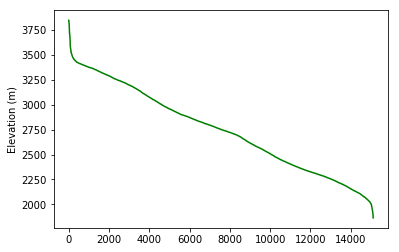

In [3]:
xdata = range(0,len(copydata))

ydata = [ int(row[1]) for row in copydata ]
ydatasorted = sorted(ydata,reverse=True)

datasorted = sorted(copydata, key= lambda dat: dat[1])

plt.plot(xdata, ydatasorted, color='green', linestyle='solid')
plt.ylabel('Elevation (m)')

plt.show()

## Find distribution of the forest cover labels

Since the forest cover labels turned out to be uniformly distributed, let's plot the "horizontal distance to hydrology".

56
{'5': 2160, '2': 2160, '1': 2160, '7': 2160, '3': 2160, '6': 2160, '4': 2160}


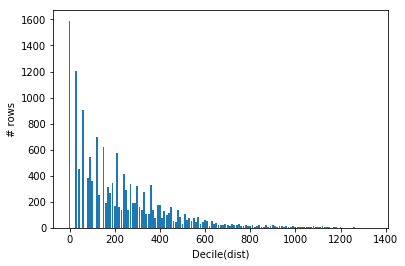

In [20]:
print(len(copydata[0]))

fccnts = {}
for row in copydata:
    if row[55] in fccnts:
        fccnts[row[55]]+=1
    else:
        fccnts[row[55]]=1

print(fccnts)

from collections import Counter

hydrodata = [int(row[4]) for row in copydata ]

# note that // is the integer division operator
decile = lambda dist : dist // 10 * 10
histogram = Counter(decile(dist) for dist in hydrodata)

#print(type(histogram.keys()))

plt.bar(list(histogram.keys()),histogram.values(),8)
plt.xlabel('Decile(dist)')
plt.ylabel('# rows')
plt.show()
